### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [76]:
import numpy as np
import pandas as pd
cars_df = pd.read_csv('vehicle.csv').dropna()
cars_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [77]:
cars_df.isna().any()


compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [21]:
cars_df.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [22]:
cars_df.groupby(["class"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
car,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413
van,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195


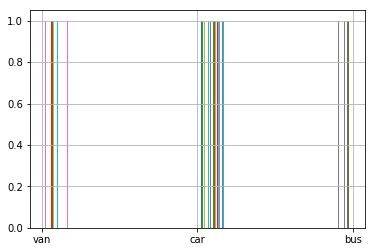

In [23]:
cars_df['class'].hist()

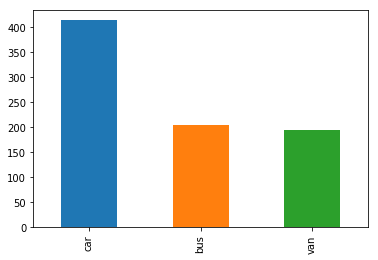

In [25]:
import matplotlib.pyplot as plt
cars_df['class'].value_counts().plot(kind='bar')


### Check for any missing values in the data 

In [26]:
cars_df.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

### 3. Standardize the data 

In [78]:
cars_df.head().T

,0,1,2,3,4
compactness,95,91,104,93,85
circularity,48,41,50,41,44
distance_circularity,83,84,106,82,70
radius_ratio,178,141,209,159,205
pr.axis_aspect_ratio,72,57,66,63,103
max.length_aspect_ratio,10,9,10,9,52
scatter_ratio,162,149,207,144,149
elongatedness,42,45,32,46,45
pr.axis_rectangularity,20,19,23,19,19
max.length_rectangularity,159,143,158,143,144


In [79]:
from scipy.stats import zscore
X_cars_df = cars_df.drop("class", axis=1)
Y=cars_df['class']


X_cars_df = X_cars_df.apply(zscore)
X_cars_df.head().T

,0,1,2,3,4
compactness,0.163231,-0.322874,1.256966,-0.079822,-1.052030
circularity,0.520408,-0.619123,0.845988,-0.619123,-0.130753
distance_circularity,0.060669,0.124067,1.518823,-0.002729,-0.763506
radius_ratio,0.264970,-0.836393,1.187734,-0.300595,1.068668
pr.axis_aspect_ratio,1.283254,-0.599253,0.530251,0.153750,5.173770
max.length_aspect_ratio,0.299721,0.085785,0.299721,0.085785,9.285029
scatter_ratio,-0.198517,-0.591720,1.162569,-0.742952,-0.591720
elongatedness,0.129648,0.514333,-1.152637,0.642562,0.514333
pr.axis_rectangularity,-0.217151,-0.606014,0.949438,-0.606014,-0.606014
max.length_rectangularity,0.766312,-0.337462,0.697326,-0.337462,-0.268476


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

#This is done above 

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [54]:
import array
distortion = []
distortion

[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [80]:
from sklearn.cluster import KMeans
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
distortion = []
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_cars_df)
    prediction=model.predict(X_cars_df)
    distortion.append(sum(np.min(cdist(X_cars_df, model.cluster_centers_, 'euclidean'), axis=1)) / X_cars_df.shape[0])
    
clusters_df = pd.DataFrame( { "num_clusters":clusters, "Distortion": distortion } )
#clusters_df[0:15]
clusters_df[0:15]



,num_clusters,Distortion
0,1,3.939299
1,2,2.966824
2,3,2.642794
3,4,2.550686
4,5,2.427313
5,6,2.315330
6,7,2.242209
7,8,2.171531
8,9,2.112734


Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

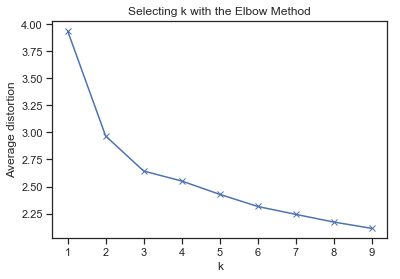

In [81]:
plt.plot(clusters, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

Ans: Based on the above Elbow plot and distortion values , it is reccomneded to have 3 cluster , hence K = 3

In [96]:
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#sns.pairplot(X_cars_df,diag_kind = 'kde')

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [91]:
final_model=KMeans(3)
final_model.fit(X_cars_df)
prediction=final_model.predict(X_cars_df)
X_cars_df_z = X_cars_df.copy(deep = True)
X_cars_df_z.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [92]:
#Append the prediction 
cars_df["GROUP"] = prediction
print("Groups Assigned : \n")
cars_df[["class", "GROUP"]].head()
cars_df.head()

Groups Assigned : 



,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,GROUP
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,1


In [93]:
centroids = final_model.cluster_centers_

In [94]:
centroids

array([[ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91400071, -0.51327609, -0.88664922, -1.05602904, -0.49182906,
        -0.21883169, -0.775563  ,  0.85996991, -0.74203582, -0.47827281,
        -0.77910348, -0.78034412, -0.37943428,  0.82611912, -0.08658373,
        -0.30355495, -1.04650237, -1.10265258],
       [-0.2319252 , -0.57973847, -0.30724438, -0.02693437,  0.20516443,
        -0.11572895, -0.45873352,  0.32447256, -0.48810058, -0.54152679,
        -0.41282893, -0.46297248, -0.60799507, -0.62342017, -0.06824398,
         0.01513248,  0.82481456,  0.71018194]])

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [98]:
centroid_df = pd.DataFrame(centroids, columns = list(X_cars_df_z) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
1,-0.914001,-0.513276,-0.886649,-1.056029,-0.491829,-0.218832,-0.775563,0.859970,-0.742036,-0.478273,-0.779103,-0.780344,-0.379434,0.826119,-0.086584,-0.303555,-1.046502,-1.102653
2,-0.231925,-0.579738,-0.307244,-0.026934,0.205164,-0.115729,-0.458734,0.324473,-0.488101,-0.541527,-0.412829,-0.462972,-0.607995,-0.623420,-0.068244,0.015132,0.824815,0.710182


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [113]:
labels = final_model.labels_

cars_df["LABELS"] = labels
print("Labels Assigned : \n")
cars_df[["class", "LABELS"]].head()
cars_df[['class', 'GROUP', 'LABELS']].sample(10 , random_state=3)

Labels Assigned : 



,class,GROUP,LABELS
416,bus,2,2
292,bus,2,2
12,bus,2,2
321,bus,0,0
30,van,2,2
476,car,0,0
588,car,2,2
93,van,2,2
685,bus,1,1
200,van,2,2


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [114]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [128]:
combine_data = np.concatenate((a,b,c), axis = 0)
combine_data.shape

(250, 2)

### 9. Combine all three arrays a,b,c into a dataframe

In [130]:
DF_1 = pd.DataFrame(combine_data, columns=['Label_1', 'Label_2'])
DF_1.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

C:\Users\Sony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


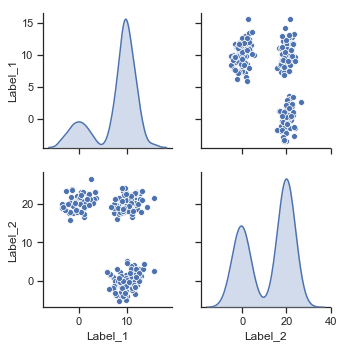

In [131]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(DF_1,diag_kind = 'kde')

### 11. Find out the linkage matrix

In [150]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, ward, fcluster
import scipy.cluster.hierarchy as sch


Use ward as linkage metric and distance as Eucledian

In [165]:
z = sch.linkage(DF_1,method = 'ward' , metric = 'euclidean')
z

array([[1.51000000e+02, 2.34000000e+02, 4.19062429e-02, 2.00000000e+00],
       [1.12000000e+02, 1.25000000e+02, 4.48097004e-02, 2.00000000e+00],
       [9.30000000e+01, 9.90000000e+01, 4.48326135e-02, 2.00000000e+00],
       [2.19000000e+02, 2.35000000e+02, 6.08697817e-02, 2.00000000e+00],
       [1.94000000e+02, 2.28000000e+02, 7.20652692e-02, 2.00000000e+00],
       [1.70000000e+01, 6.10000000e+01, 7.91737894e-02, 2.00000000e+00],
       [2.30000000e+01, 5.70000000e+01, 8.32461606e-02, 2.00000000e+00],
       [2.07000000e+02, 2.38000000e+02, 9.26502394e-02, 2.00000000e+00],
       [1.77000000e+02, 1.92000000e+02, 1.03753502e-01, 2.00000000e+00],
       [0.00000000e+00, 6.00000000e+01, 1.16671010e-01, 2.00000000e+00],
       [2.48000000e+02, 2.50000000e+02, 1.22754468e-01, 3.00000000e+00],
       [7.00000000e+00, 4.00000000e+01, 1.24309361e-01, 2.00000000e+00],
       [1.86000000e+02, 2.53000000e+02, 1.25319071e-01, 3.00000000e+00],
       [1.30000000e+02, 1.49000000e+02, 1.31943427e

### 12. Plot the dendrogram for the consolidated dataframe

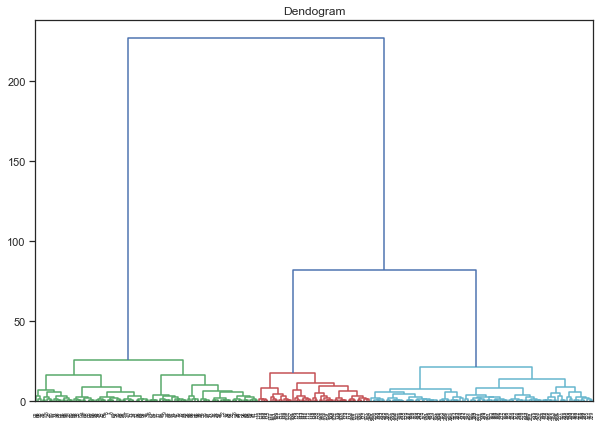

In [196]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(z, color_threshold=26)

### 13. Recreate the dendrogram for last 12 merged clusters 

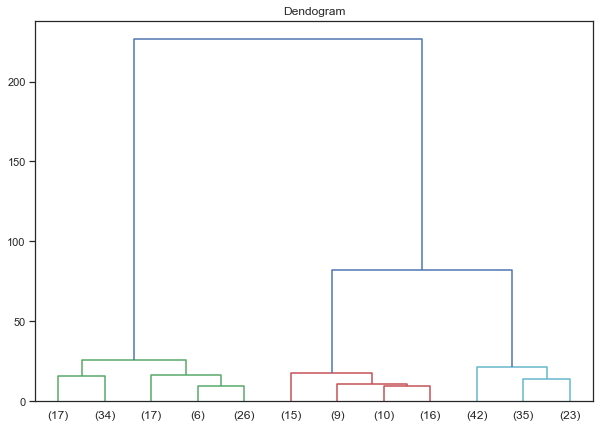

In [181]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = sch.dendrogram(z, color_threshold=26, truncate_mode='lastp', p=12)

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

# Ans: 26 is the optimal distance between clusters as This has given us 3 clusters which can be grouped together .

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [161]:
w = ward(pdist(DF_1))
w

array([[1.51000000e+02, 2.34000000e+02, 4.19062429e-02, 2.00000000e+00],
       [1.12000000e+02, 1.25000000e+02, 4.48097004e-02, 2.00000000e+00],
       [9.30000000e+01, 9.90000000e+01, 4.48326135e-02, 2.00000000e+00],
       [2.19000000e+02, 2.35000000e+02, 6.08697817e-02, 2.00000000e+00],
       [1.94000000e+02, 2.28000000e+02, 7.20652692e-02, 2.00000000e+00],
       [1.70000000e+01, 6.10000000e+01, 7.91737894e-02, 2.00000000e+00],
       [2.30000000e+01, 5.70000000e+01, 8.32461606e-02, 2.00000000e+00],
       [2.07000000e+02, 2.38000000e+02, 9.26502394e-02, 2.00000000e+00],
       [1.77000000e+02, 1.92000000e+02, 1.03753502e-01, 2.00000000e+00],
       [0.00000000e+00, 6.00000000e+01, 1.16671010e-01, 2.00000000e+00],
       [2.48000000e+02, 2.50000000e+02, 1.22754468e-01, 3.00000000e+00],
       [7.00000000e+00, 4.00000000e+01, 1.24309361e-01, 2.00000000e+00],
       [1.86000000e+02, 2.53000000e+02, 1.25319071e-01, 3.00000000e+00],
       [1.30000000e+02, 1.49000000e+02, 1.31943427e

In [185]:
ff = fcluster(w, t=26, criterion='distance')
ff


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

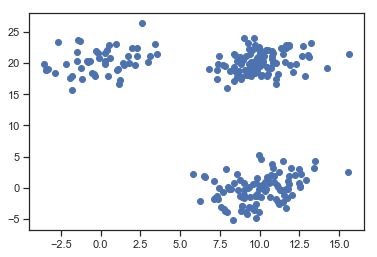

In [191]:
plt.scatter(DF_1['Label_1'], DF_1['Label_2'], data=ff)

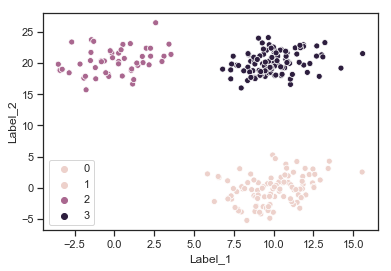

In [194]:
sns.scatterplot(DF_1['Label_1'], DF_1['Label_2'],hue=ff )